In [84]:
import findspark

In [85]:
findspark.init("/usr/local/Cellar/apache-spark/2.4.2/libexec")

In [144]:
from datetime import datetime
from pyspark.context import SparkContext
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
from pyspark.sql.types import IntegerType
from pyspark.sql import Row
from pyspark.ml.classification import NaiveBayes
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
from pyspark.ml.classification import DecisionTreeClassifier


In [88]:
spark = SparkSession(sc)

In [89]:
df = spark.createDataFrame([
...     Row(label=0.0, weight=0.1, features=Vectors.dense([0.0, 0.0])),
...     Row(label=0.0, weight=0.5, features=Vectors.dense([0.0, 1.0])),
...     Row(label=1.0, weight=1.0, features=Vectors.dense([1.0, 0.0]))])

In [133]:
def vector_from_inputs(r):
      return (r["rain"], Vectors.dense(int(r["station_number"]),
                                            int(r["month"]),
                                            float(r["mean_temp"]),
                                            float(r["mean_dew_point"]),
                                            float(r["mean_visibility"]),
                                            float(r["mean_wind_speed"]),
                                            float(r["max_sustained_wind_speed"]),
                                            float(r["max_temperature"]),
                                            float(r["total_precipitation"])))

In [95]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial", weightCol="weight")

In [96]:
model = nb.fit(df)

In [97]:
test0 = sc.parallelize([Row(features=Vectors.dense([1.0, 0.0]))]).toDF()

In [98]:
result = model.transform(test0).head()

In [99]:
result.prediction

1.0

In [101]:
train,test = changedTypedf.randomSplit([0.7, 0.3], seed = 2018)


In [122]:

numeric_features = [t[0] for t in changedTypedf.dtypes if t[1] == 'int']
double_features = [t[0] for t in changedTypedf.dtypes if t[1] == 'double']
for i in double_features:
    numeric_features.append(i)
numeric_features.remove('_c0')
changedTypedf.select(numeric_features).describe().toPandas().transpose()




,0,1,2,3,4
summary,count,mean,stddev,min,max
station_number,1000,397909.338,236655.81367661917,10010,986460
month,1000,6.588,3.348950801590176,1,12
rain,1000,0.076,0.26513071171460756,0,1
mean_temp,1000,48.67229998427629,27.521490451208216,-42.0,96.3000030517578
mean_dew_point,1000,38.418899969264864,26.348835883206263,-47.5,79.80000305175781
mean_visibility,1000,13.356299998767675,8.591916097837258,0.10000000149011612,44.79999923706055
mean_wind_speed,1000,6.170299996778369,4.821191954198596,0.20000000298023224,37.400001525878906
max_sustained_wind_speed,1000,10.746900020241737,6.59007430925834,1.899999976158142,54.4000015258789
max_temperature,1000,39.84470005323738,27.894763914995643,-47.599998474121094,87.30000305175781


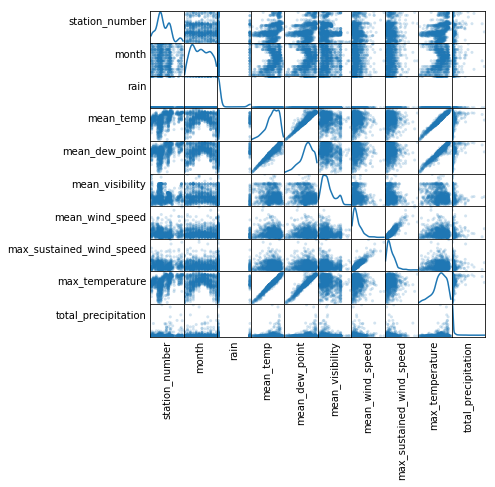

In [132]:
numeric_data = changedTypedf.select(numeric_features).toPandas()
# axs = changedTypedf.scatter_matrix(numeric_data, figsize=(8, 8))
axs = scatter_matrix(numeric_data, alpha=0.2, figsize=(6, 6), diagonal='kde')
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
    
    

+---+--------------+-----+------------------+------------------+------------------+------------------+------------------------+------------------+--------------------+----+
|_c0|station_number|month|         mean_temp|    mean_dew_point|   mean_visibility|   mean_wind_speed|max_sustained_wind_speed|   max_temperature| total_precipitation|rain|
+---+--------------+-----+------------------+------------------+------------------+------------------+------------------------+------------------+--------------------+----+
|  0|         85120|    2|58.099998474121094| 50.20000076293945| 9.800000190734863|13.800000190734865|      16.899999618530273|  52.9000015258789| 0.20000000298023224| 0.0|
|  1|         26260|    6| 56.70000076293945|41.900001525878906|14.199999809265135|               2.0|       4.099999904632568| 37.79999923706055|                 0.0| 0.0|
|  2|        172400|    7|  76.4000015258789| 52.79999923706055|18.200000762939453| 6.099999904632568|                    12.0| 67.3000

Row(features=DenseVector([0.0, 0.0]), label=0.0, weight=0.1)

In [164]:
df = pd.read_csv('results-20190505-160439.csv')
df['rain'].replace(df['rain'].unique()[0],0,inplace=True)
df['rain'].replace(df['rain'].unique()[1],1,inplace=True)



In [49]:
df.to_csv('data.csv')

## Month Rain Number

Text(0, 0.5, 'Number of rain day')

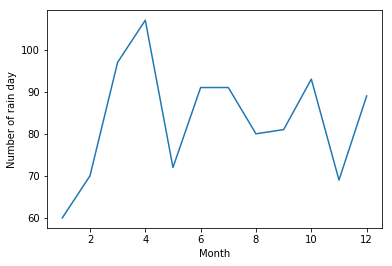

In [173]:
m_r=df.groupby('month').count()['rain']
plt.plot(m_r,label="Month Rain Number")
plt.xlabel('Month')
plt.ylabel('Number of rain day')

In [188]:
s_r=df.groupby(['station_number']).count()['rain']

df_without_station = df.copy()

In [190]:
df_without_station.drop(['station_number'],axis=1,inplace=True)

In [186]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 4.3MB/s ta 0:00:01


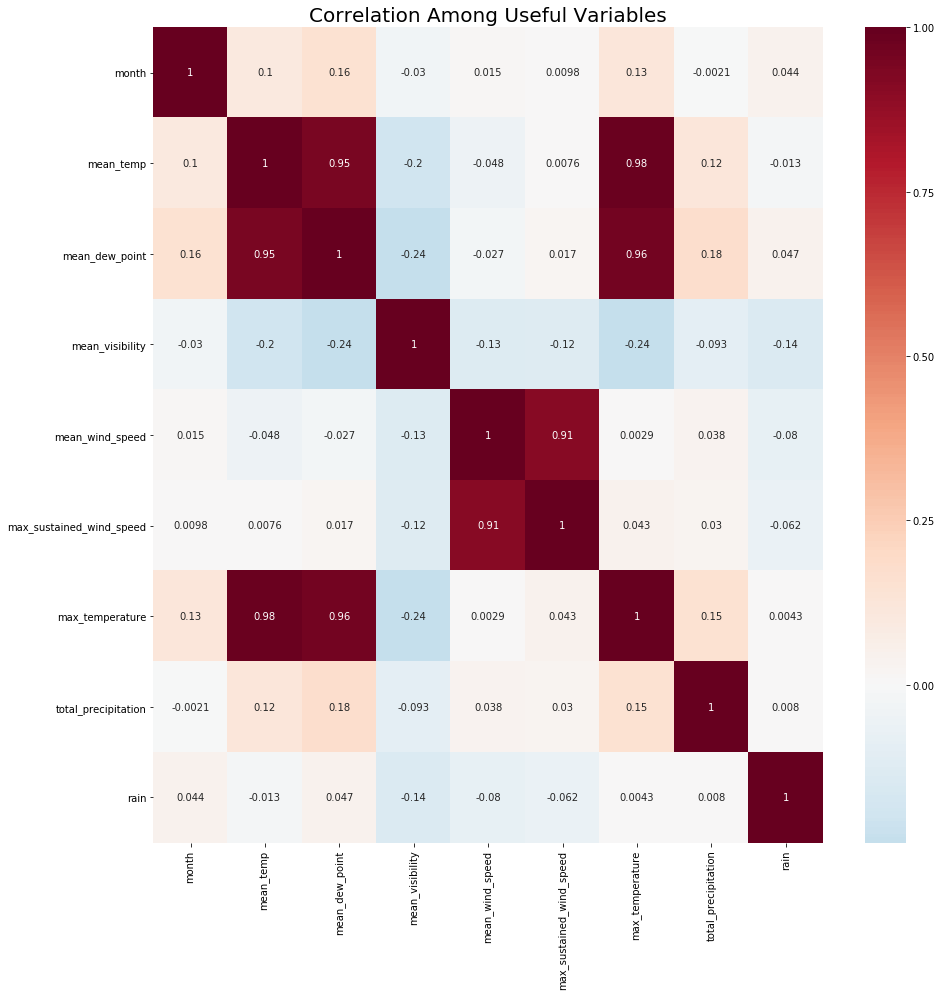

In [191]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df_without_station.corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation Among Useful Variables',fontsize=20)
plt.show()

In [185]:
df_sp = spark.read.csv('data.csv',inferSchema = True, header = True)


Automatic pdb calling has been turned ON


In [74]:
changedTypedf = df_sp.withColumn("rain", df_sp["rain"].cast(IntegerType()))


In [75]:
changedTypedf.show()

+---+--------------+-----+------------------+------------------+------------------+------------------+------------------------+------------------+--------------------+----+
|_c0|station_number|month|         mean_temp|    mean_dew_point|   mean_visibility|   mean_wind_speed|max_sustained_wind_speed|   max_temperature| total_precipitation|rain|
+---+--------------+-----+------------------+------------------+------------------+------------------+------------------------+------------------+--------------------+----+
|  0|         85120|    2|58.099998474121094| 50.20000076293945| 9.800000190734863|13.800000190734865|      16.899999618530273|  52.9000015258789| 0.20000000298023224|   0|
|  1|         26260|    6| 56.70000076293945|41.900001525878906|14.199999809265135|               2.0|       4.099999904632568| 37.79999923706055|                 0.0|   0|
|  2|        172400|    7|  76.4000015258789| 52.79999923706055|18.200000762939453| 6.099999904632568|                    12.0| 67.3000

In [135]:
df_vec=changedTypedf.rdd.map(vector_from_inputs).toDF(["label","features"])

In [136]:
train,test = df_vec.randomSplit([0.7, 0.3], seed = 2018)


In [137]:
nb = LogisticRegression(regParam=0.01,maxIter=1000,featuresCol = 'features', labelCol = 'label')


In [138]:
model_nb = nb.fit(train)
    

In [139]:
predictions = model_nb.transform(test)


In [141]:

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7110380325993719


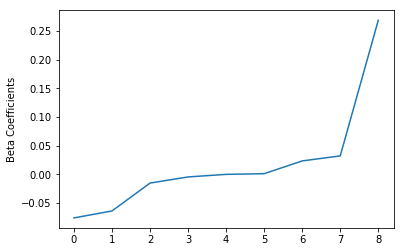

In [142]:
beta = np.sort(model_nb.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


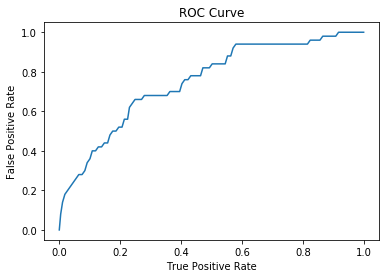

Training set areaUnderROC: 0.7506870229007635


In [143]:
trainingSummary = model_nb.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [158]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 10)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)


In [159]:
evaluator_dt = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator_dt.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5757792393480126


In [148]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)


In [149]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6297540749213615


In [161]:

# print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC)

AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'summary'